**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
Class_2_data = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

#### <font color=blue> Viewing head of dataset </font>

In [3]:
# Viewing head of dataset:

Class_2_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


#### <font color=blue> Viewing tail of dataset </font>

In [4]:
# Viewing tail of dataset:

Class_2_data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


#### <font color=blue> Check the shape </font>

In [5]:
# Check the shape of the dataset:

Class_2_data.shape

(310, 7)

#### <font color=blue> View 2Classdata information </font>

In [6]:
# Check the dataset info for better understanding:

Class_2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


#### <font color=blue> Check for missing values </font>

In [7]:
# Checking for missing values:

Class_2_data.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [8]:
# Check if any value is 0:

Class_2_data[Class_2_data.iloc[:,0:5] == 0].isna().sum()

pelvic_incidence            310
pelvic_tilt numeric         310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
class                       310
dtype: int64

#### Inference:

No values are missing. So we are good to proceed.

#### <font color=blue>Find unique values in 'class' </font>

In [9]:
# Finding unique values in "class":

Class_2_data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

#### Inference:
2 unique values are present in 'class' column

#### <font color=blue>Check the distribution of data set </font>

#### <font color=brown>(i) Using describe() </font>

In [10]:
# Find distribution of class values and other attributes:

Class_2_data.describe(include='all')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


#### <font color=brown>(ii) Finding distribution of all attributes with respect to class values </font>

#### Using Distplot 

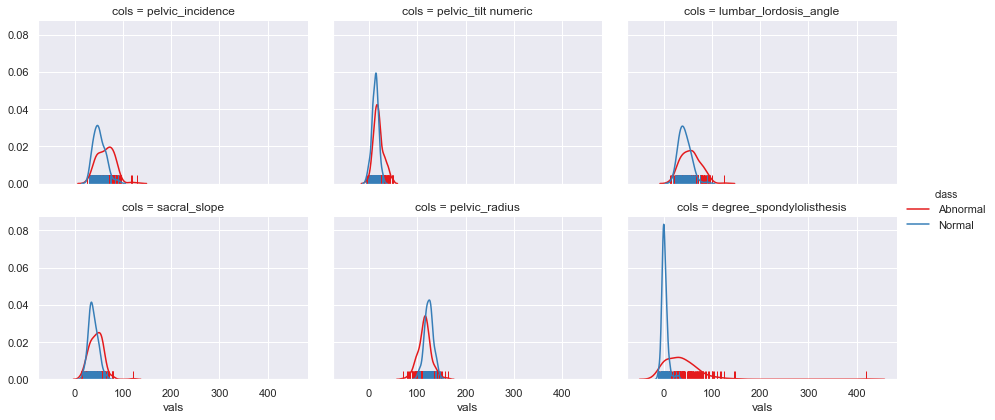

In [11]:
df = Class_2_data.melt(['class'], var_name='cols',  value_name='vals')
sns.set(rc={'figure.figsize':(10,6)})
g = sns.FacetGrid(df, col='cols', hue="class", palette="Set1", col_wrap=3, aspect=11.7/8.27)
g = (g.map(sns.distplot, "vals", hist=False, rug=True).add_legend())

#### Check for Central tendency, Dispersion & Outliers using boxplot:

C:\acon\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


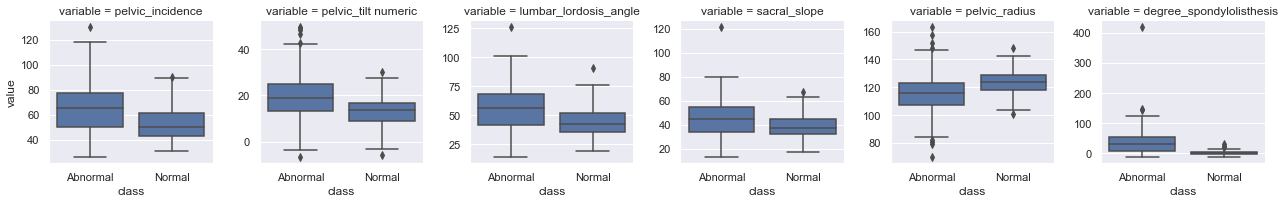

In [12]:
## Distribution of class values and other attributes:

Class_2_data_plt = Class_2_data.melt(id_vars=['class'])

cols = ['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']
grid = sns.FacetGrid(Class_2_data_plt[Class_2_data_plt.variable.isin(cols)], col='variable',sharey=False)
grid.map(sns.boxplot, 'class', 'value')


#### <font color=blue>Datatype information </font>

In [13]:
## Datatype information:

Class_2_data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

#### <font color=blue>Distribution of different classes for pelvic_radius & sacral_scope </font>

C:\acon\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


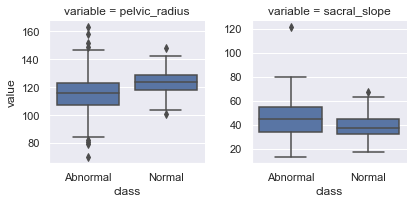

In [14]:
## Plotting the distribution of different classes for pelvic_radius and sacral_slope for visualization:

Class_2_data_plt = Class_2_data.melt(id_vars=['class'])

cols = ['pelvic_radius','sacral_slope']
grid = sns.FacetGrid(Class_2_data_plt[Class_2_data_plt.variable.isin(cols)], col='variable',sharey=False, col_order=cols)
grid.map(sns.boxplot, 'class', 'value')


# Encode the Class variable to integer.

#### <font color=blue>Use Label Encoder </font>

In [15]:
## Class values before Encoding:

Class_2_data["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [16]:
## Label Encoding:

le = LabelEncoder()
Class_2_data.iloc[:,-1] = le.fit_transform(Class_2_data.iloc[:,-1])

In [17]:
## Class values after Encoding:

Class_2_data["class"].value_counts()

0    210
1    100
Name: class, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

#### <font color=blue>Create X and y datasets  </font>

In [18]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = Class_2_data.drop(labels = "class", axis = 1)

In [19]:
# Create a separate dataframe consisting only of the dependent attribute, here "class"
y = Class_2_data[["class"]]

# Normalize your Data (X) to get values between 0 to 1.

#### <font color=blue>Normalize data using MinMaxScaler  </font>

In [20]:
# Before Normalizing:

X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [21]:
# Since data has to be normalized between 0 & 1, we use MinMaxScaler

mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [22]:
# After Normalizing:

X.head()

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


# Split the dat as train and test with a ratio of 70:30.

#### <font color=blue>Create training and test datasets in 70:30 ratio  </font>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Build the KNN model using Train Dataset and predict the class on test dataset.

#### <font color=blue>Building KNN model using default value of K which is 5 </font>

In [24]:
# KNN model
KNN = KNeighborsClassifier()

# Train the model
KNN.fit(X_train, y_train)

# Test the model
y_pred = KNN.predict(X_test)

C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

#### <font color=blue>Calculate performance of model </font>

In [25]:
# Get the test accuracy score

print('\n\033[1mTest performance Accuracy:\033[0m',KNN.score(X_test, y_test))


Test performance Accuracy: 0.7634408602150538


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

#### <font color=blue>Finding the Optimum value of K  </font>

In [26]:
maxK = int(np.sqrt(X_train.shape[0]))
optimalTrainAccuracy = 0

In [27]:
KNN_score_df = pd.DataFrame(columns=('kval','score'))
for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        KNN = KNeighborsClassifier(n_neighbors=k_i)
        KNN.fit(X_train, y_train)
        KNN_score = KNN.score(X_train, y_train)
        KNN_score_df = KNN_score_df.append({'kval': k_i, 'score': KNN_score}, ignore_index=True)
        if(KNN_score > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = KNN_score

print('\n\033[1mOptimum value of K: \033[0m',optimalK)
print('\n\033[1mOptimal Train Accuracy: \033[0m',optimalTrainAccuracy,'\n')


Optimum value of K:  3

Optimal Train Accuracy:  0.8940092165898618 



C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

#### <font color=blue>Plot to see graphical visualization of k value: </font>

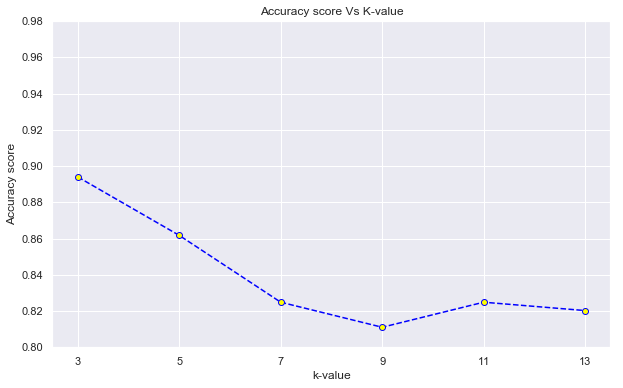

In [28]:
plt.plot(KNN_score_df['kval'], KNN_score_df['score'],color='blue',linestyle='dashed',marker='o',markerfacecolor = 'yellow')
plt.xlabel('k-value')
plt.ylabel('Accuracy score')
plt.title('Accuracy score Vs K-value')
plt.yticks(np.arange(0.8, 1, 0.02))
plt.xticks(np.arange(3, 14, 2))
plt.show()

#### Inference:

Optimal k values is **3** with an accuracy of 0.89

#### <font color=blue>Train and test the model with the best found K value of 3 </font>

In [29]:
## Train and test the model with the best found K value of 3

KNN = KNeighborsClassifier(n_neighbors=3)

## Train the data
KNN.fit(X_train, y_train) 

## Test the data
y_pred = KNN.predict(X_test)

## Performance score
print('\n\033[1mPerformance score with k value as 3: \033[0m', metrics.accuracy_score(y_test, y_pred),'\n')


Performance score with k value as 3:  0.7526881720430108 



C:\acon\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#### <font color=blue>Build the confusion matrix </font>

In [30]:
# Confusion matrix:

print('\n\033[1mConfusion matrix: \033[0m')
metrics.confusion_matrix(y_test, y_pred)


Confusion matrix: 


array([[52,  7],
       [16, 18]], dtype=int64)

### <font color=blue>Overall Inference on 2ClassData analysis </font>

**Initial data analysis:**
-  2Class Dataset had 310 rows and 7 columns.
-  No missing values were found.
-  Label Encoding was used to convert categorical 'class' column 
-  Data was normalized using MinMaxScaler method

**KNN model building:**
-  Data set was split into 70% training and 30% test.
-  Initial test accuracy for default value of k (=5) is 0.7634

-  Found the maximum possible value of K using square root of train data
-  Model was run for multiple values of K and the best value was found to be 3 with a train accuracy of 0.894
-  Later, the model was trained with the best K value of 3 and the test accuracy was found to be 0.7527

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [31]:
Class_3_data = pd.read_csv('3Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

#### <font color=blue>Viewing head of dataset </font>

In [32]:
# Viewing head of dataset:

Class_3_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


#### <font color=blue>Viewing tail of dataset </font>

In [33]:
# Viewing tail of dataset:

Class_3_data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


#### <font color=blue> Check the shape </font>

In [34]:
# Check the shape of the dataset:

Class_3_data.shape

(310, 7)

#### <font color=blue> View 3Classdata information </font>

In [35]:
# Check the dataset info for better understanding:

Class_3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


#### <font color=blue>Check for missing values </font>

In [36]:
# Checking for missing values:

Class_3_data.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [37]:
# Check if any value is 0:

Class_3_data[Class_3_data.iloc[:,0:5] == 0].isna().sum()

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
class                       310
dtype: int64

#### Inference:
No values are missing. So we are good to proceed.

#### <font color=blue>Find unique values in 'class' </font>

In [38]:
# Finding unique values in "class":

Class_3_data['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

#### Inference:

3 unique values are present in 'class' column

#### <font color=blue>Check the distribution of data set </font>

#### <font color=brown>(i). Using describe() </font>

In [39]:
# Find distribution of class values and other attributes:

Class_3_data.describe(include='all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


#### <font color=brown>(ii). Finding distribution of all attributes with respect to class values </font>

#### Using Distplot 

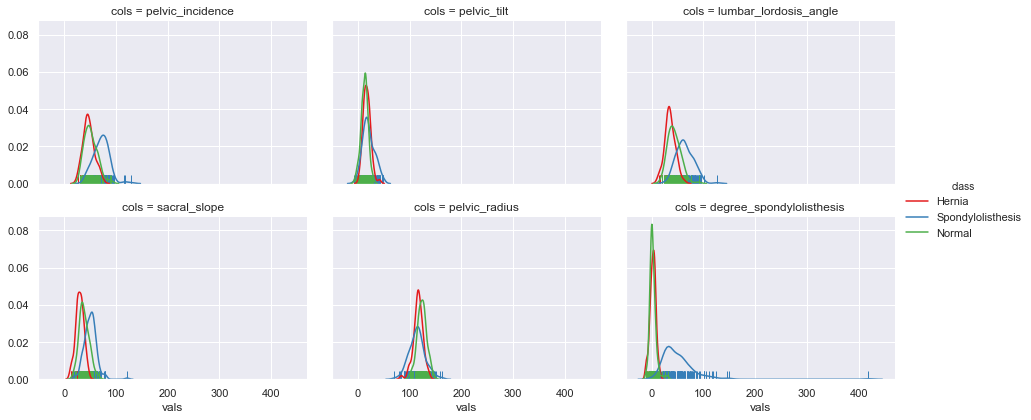

In [40]:
df1 = Class_3_data.melt(['class'], var_name='cols',  value_name='vals')
sns.set(rc={'figure.figsize':(10,6)})
g = sns.FacetGrid(df1, col='cols', hue="class", palette="Set1", col_wrap=3, aspect=11.7/8.27)
g = (g.map(sns.distplot, "vals", hist=False, rug=True).add_legend())

#### Check for Central tendency, Dispersion & Outliers using boxplot:

C:\acon\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


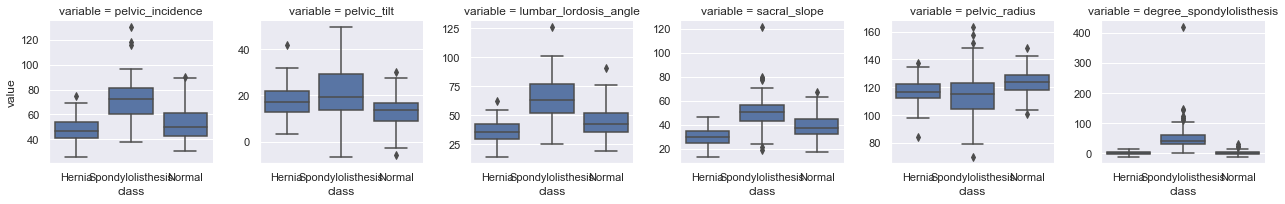

In [41]:
## Distribution of class values and other attributes:

Class_3_data_plt = Class_3_data.melt(id_vars=['class'])

cols = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']
grid = sns.FacetGrid(Class_3_data_plt[Class_3_data_plt.variable.isin(cols)], col='variable',sharey=False)
grid.map(sns.boxplot, 'class', 'value')


#### <font color=blue>Datatype information </font>

In [42]:
## Datatype information:

Class_3_data.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

#### <font color=blue>Distribution of different classes for pelvic_radius & sacral_scope </font>

C:\acon\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


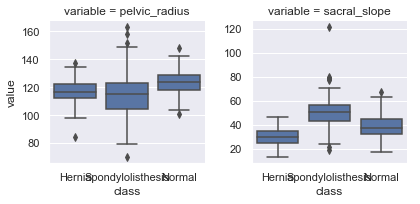

In [43]:
## Plotting the distribution of different classes for pelvic_radius and sacral_slope for visualization:

Class_3_data_plt = Class_3_data.melt(id_vars=['class'])

cols = ['pelvic_radius','sacral_slope']
grid = sns.FacetGrid(Class_3_data_plt[Class_3_data_plt.variable.isin(cols)], col='variable',sharey=False,col_order=cols,)
grid.map(sns.boxplot, 'class', 'value')


# Encode the Class variable to integer.

#### <font color=blue>Use Label Encoder </font>

In [44]:
## Class values before encoding:

Class_3_data["class"].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [45]:
## Label Encoding:

le = LabelEncoder()
Class_3_data.iloc[:,-1] = le.fit_transform(Class_3_data.iloc[:,-1])

In [46]:
## Class values after Encoding

Class_3_data["class"].value_counts()

2    150
1    100
0     60
Name: class, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

#### <font color=blue>Create X and y datasets  </font>

In [47]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = Class_3_data.drop(labels = "class", axis = 1)

In [48]:
# Create a separate dataframe consisting only of the dependent attribute, here "class"
y = Class_3_data[["class"]]

# Normalize your Data (X) to get values between 0 to 1.

In [49]:
# Before Normalizing:

X.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


#### <font color=blue>Normalize data using MinMaxScaler </font>

In [50]:
# Since data has to be normalized between 0 & 1, we use MinMaxScaler

mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [51]:
# After Normalizing:

X.head()

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


# Split the dat as train and test with a ratio of 70:30.

#### <font color=blue>Create training and test datasets in 70:30 ratio  </font>

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Build the KNN model using Train Dataset and predict the class on test dataset.

#### <font color=blue>Building KNN model using default value of K which is 5 </font>

In [53]:
# KNN model
KNN = KNeighborsClassifier()

# Train the model
KNN.fit(X_train, y_train)

# Test the model
y_pred = KNN.predict(X_test)

C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

#### <font color=blue>Calculate performance of model </font>

In [54]:
# Get the test accuracy score

print('\n\033[1mTest performance Accuracy:\033[0m', KNN.score(X_test, y_test))


Test performance Accuracy: 0.7204301075268817


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

#### <font color=blue>Finding the Optimum value of K  </font>

In [55]:
maxK = int(np.sqrt(X_train.shape[0]))
optimalTrainAccuracy = 0

In [56]:
KNN_score_df = pd.DataFrame(columns=('kval','score'))
for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        KNN = KNeighborsClassifier(n_neighbors=k_i)
        KNN.fit(X_train, y_train)
        KNN_score = KNN.score(X_train, y_train)
        KNN_score_df = KNN_score_df.append({'kval': k_i, 'score': KNN_score}, ignore_index=True)
        if(KNN_score > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = KNN_score
            
print('\n\033[1mOptimum value of K: \033[0m',optimalK)
print('\n\033[1mOptimal Train Accuracy: \033[0m',optimalTrainAccuracy,'\n')


Optimum value of K:  3

Optimal Train Accuracy:  0.8755760368663594 



C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\acon\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

#### <font color=blue>Plot to see graphical visualization of k value: </font>

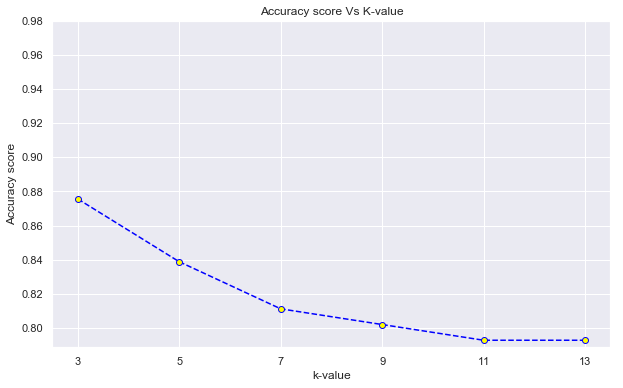

In [57]:
plt.plot(KNN_score_df['kval'], KNN_score_df['score'],color='blue',linestyle='dashed',marker='o',markerfacecolor = 'yellow')
plt.xlabel('k-value')
plt.ylabel('Accuracy score')
plt.title('Accuracy score Vs K-value')
plt.yticks(np.arange(0.8, 1, 0.02))
plt.xticks(np.arange(3, 14, 2))
plt.show()

#### Inference:

Optimal k values is **3** with an accuracy of 0.876

#### <font color=blue>Train and test the model with the best found K value of 3 </font>

In [58]:
## Train and test the model with the best found K value of 3

KNN = KNeighborsClassifier(n_neighbors=3)

## Train the data
KNN.fit(X_train, y_train) 

## Test the data
y_pred = KNN.predict(X_test)

## Performance score
print('\n\033[1mPerformance score with k value as 3: \033[0m',metrics.accuracy_score(y_test, y_pred),'\n')


Performance score with k value as 3:  0.7096774193548387 



C:\acon\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#### <font color=blue>Build the confusion matrix </font>

In [59]:
# Confusion matrix:

print('\n\033[1mConfusion Matrix: \033[0m')
metrics.confusion_matrix(y_test, y_pred)


Confusion Matrix: 


array([[ 6,  4,  1],
       [11, 18,  5],
       [ 3,  3, 42]], dtype=int64)

### <font color=blue>Overall Inference on 3ClassData analysis </font>

**Initial data analysis:**
-  3Class Dataset had 310 rows and 7 columns.
-  No missing values were found.
-  Label Encoding was used to convert categorical 'class' column 
-  Data was normalized using MinMaxScaler method

**KNN model building:**
-  Data set was split into 70% training and 30% test.
-  Initial test accuracy for default value of k (=5) is 0.7204

-  Found the maximum possible value of K using square root of train data
-  Model was run for multiple values of K and the best value was found to be 3 with a train accuracy of 0.8756
-  Later, the model was trained with the best K value of 3 and the test accuracy was found to be 0.7097